# 房价预测

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
train.describe()

/Users/hehongwei/anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,NaN,7553.500000,5.000000,5.000000,1954.000000,1967.000000,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,NaN,9478.500000,6.000000,5.000000,1973.000000,1994.000000,NaN,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,NaN,11601.500000,7.000000,6.000000,2000.000000,2004.000000,NaN,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

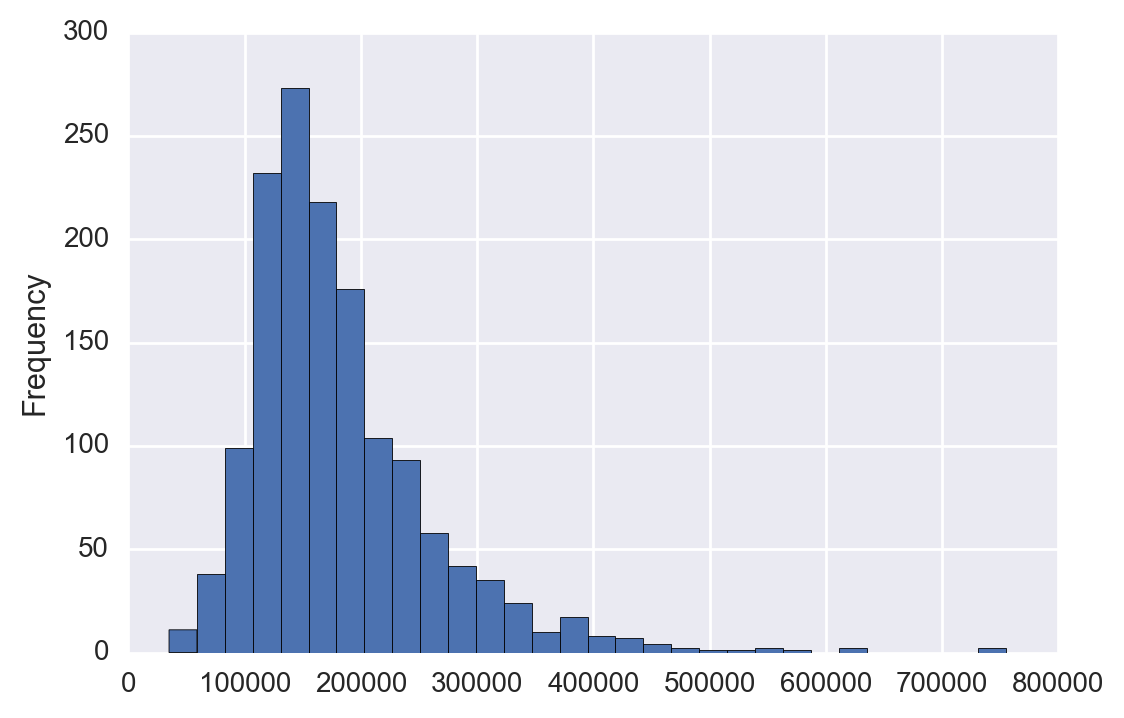

In [5]:
train['SalePrice'].plot.hist(bins=30)

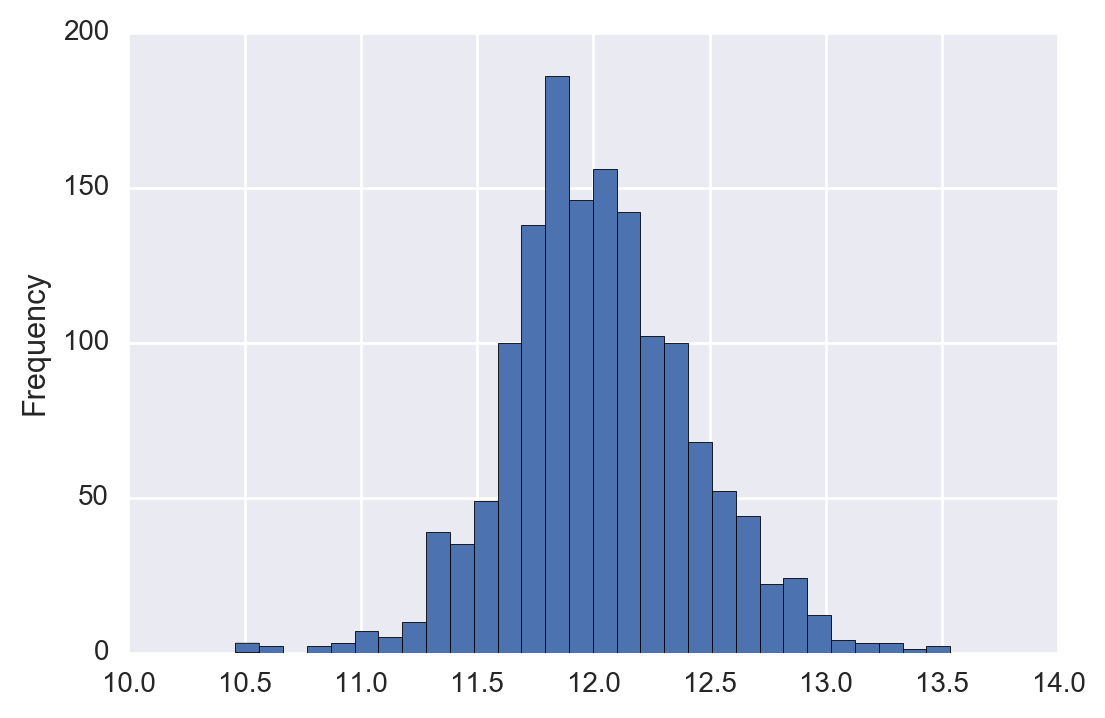

In [6]:
np.log1p(train['SalePrice']).plot.hist(bins=30)

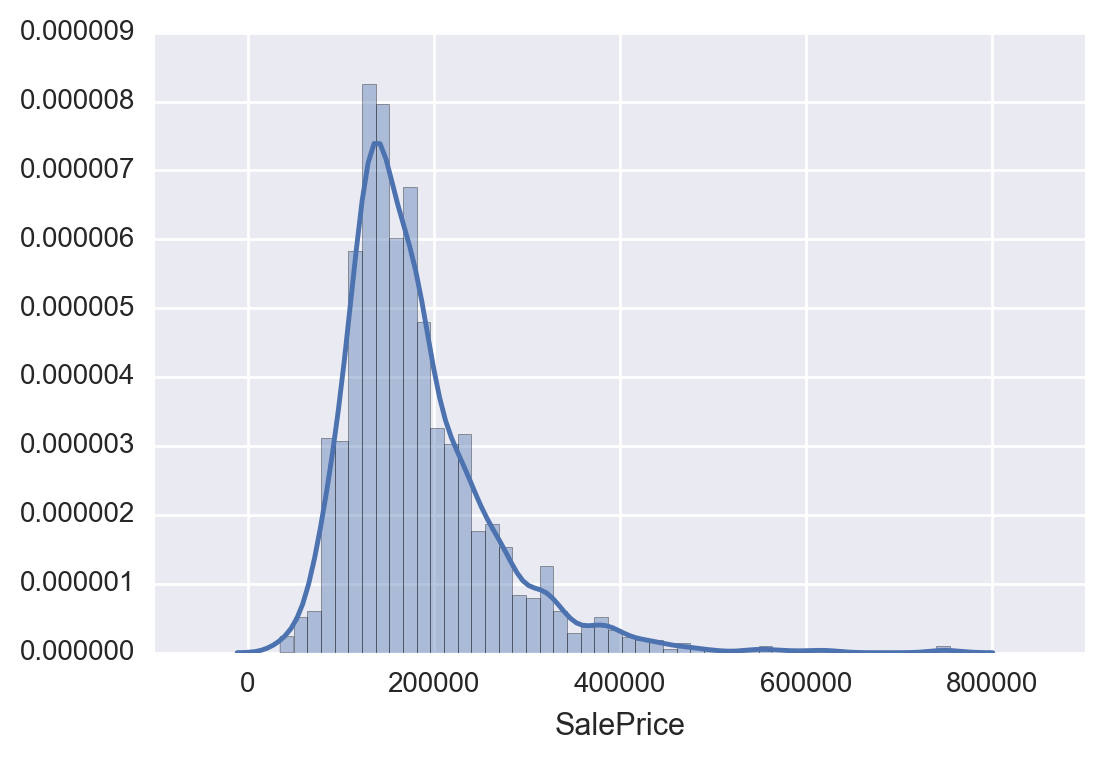

In [7]:
sns.distplot(train['SalePrice'])

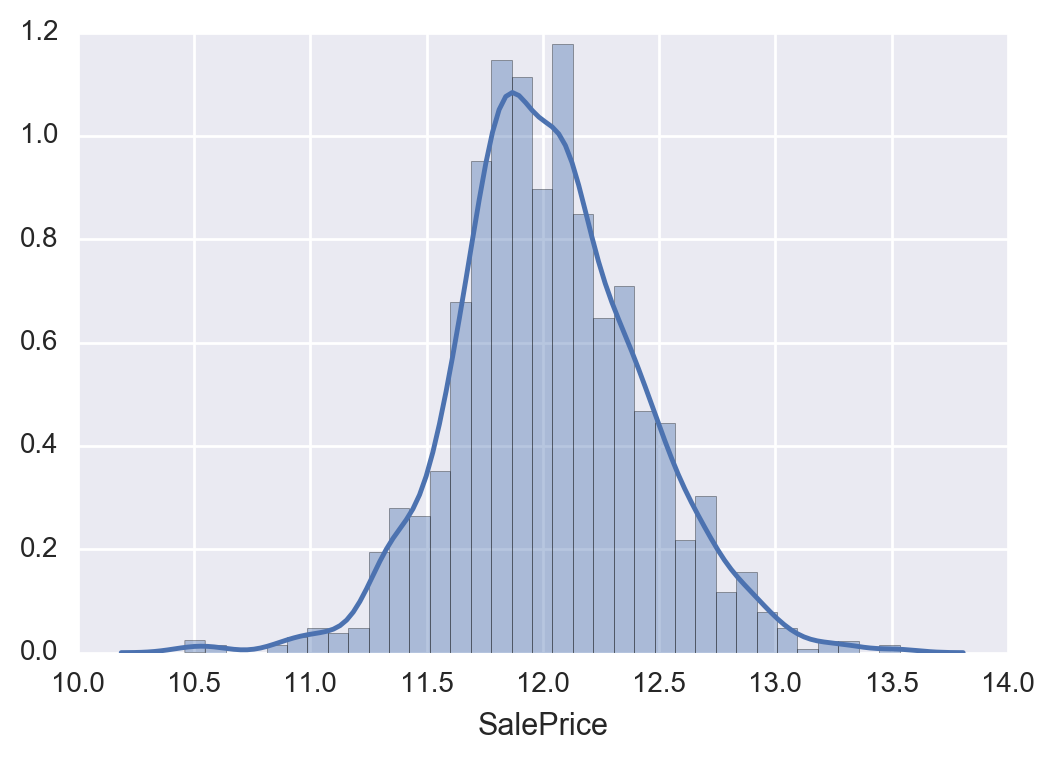

In [8]:
sns.distplot(np.log1p(train['SalePrice']))

房价取对数成正态分布

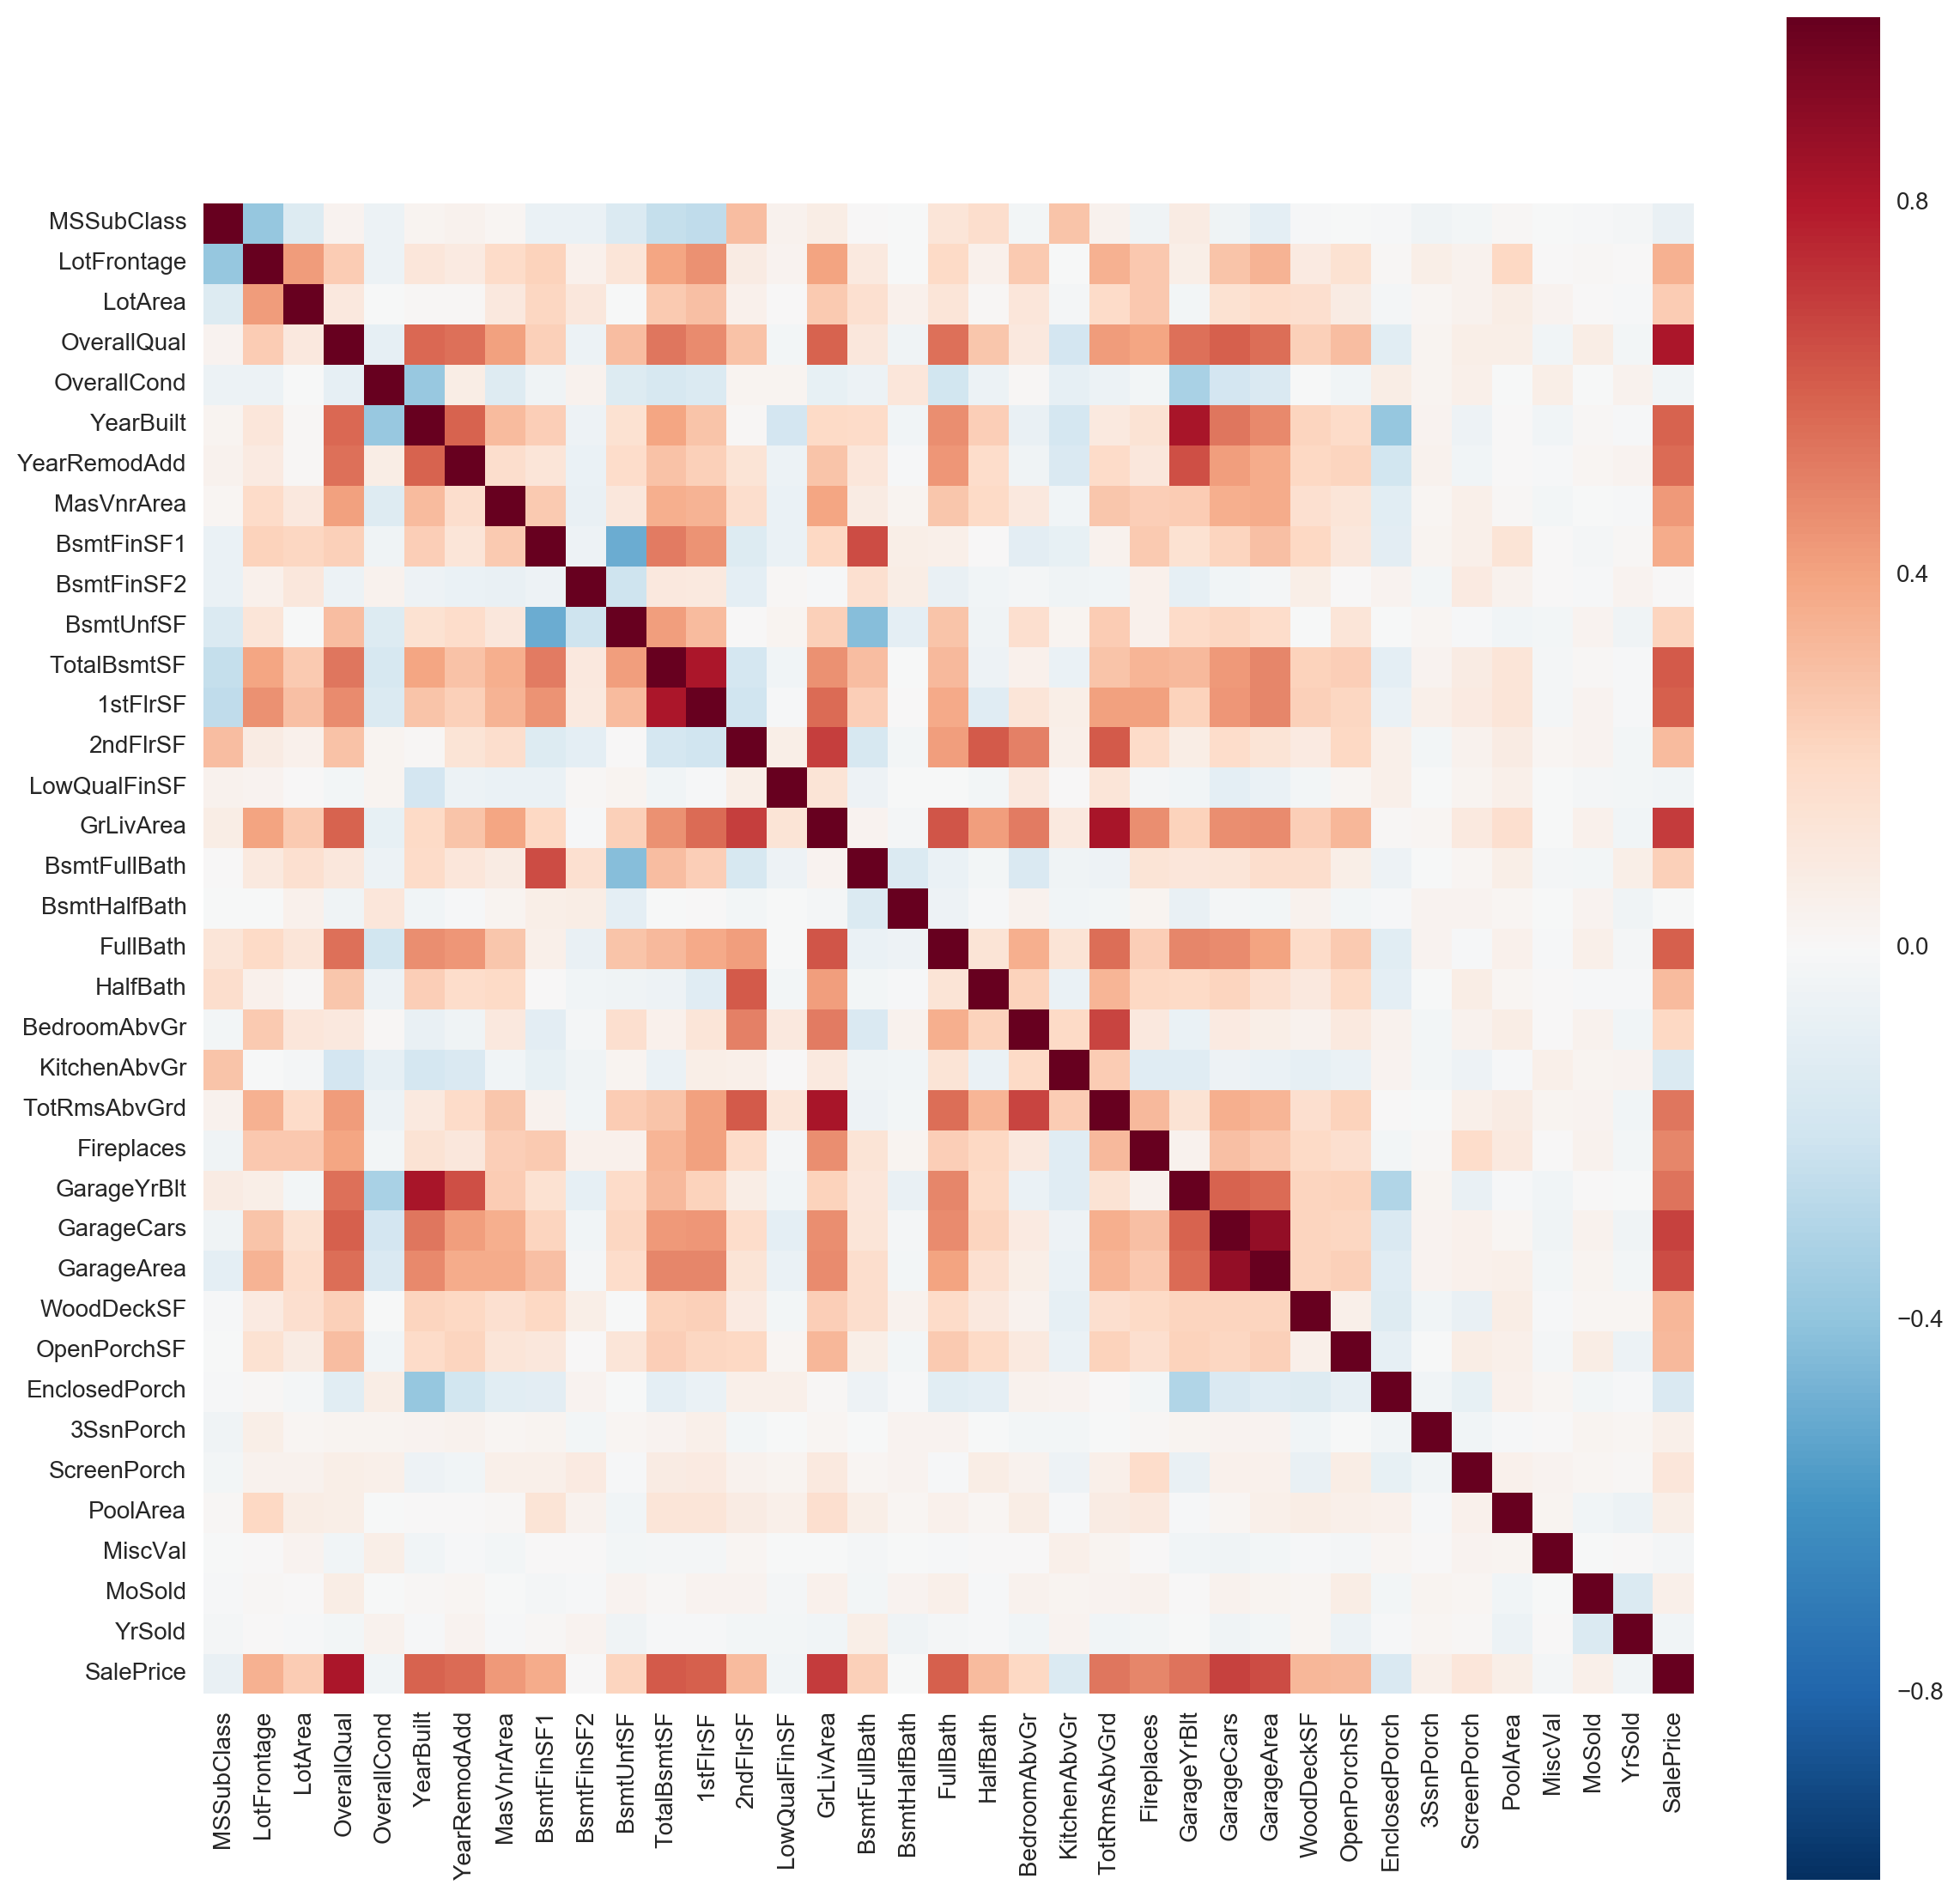

In [9]:
train['SalePrice'] = np.log1p(train['SalePrice'])
# 求float和int类型数据的相关系数
corr = train.select_dtypes(include=['float64', 'int']).iloc[:, 1:].corr()
plt.figure(figsize=(14, 14))
sns.heatmap(corr, vmax=1, square=True)

- 可以看出有些特征之间的相关性还是有点强的
- 排序各特征与房价之间的相关系数

In [10]:
print type(corr)
print corr.shape
corr.head()

<class 'pandas.core.frame.DataFrame'>
(37, 37)


,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.073959
LotFrontage,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.355879
LotArea,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.257320
OverallQual,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.817185
OverallCond,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.036868


In [11]:
cor_dict = corr['SalePrice'].to_dict() # 将SalePrice列变成字典类型，然后排序
for ele in sorted(cor_dict.items(), key = lambda x: -abs(x[1])):
    print('{0}: \t{1}'.format(*ele))

SalePrice: 	1.0
OverallQual: 	0.817184614487
GrLivArea: 	0.700926987143
GarageCars: 	0.680624872658
GarageArea: 	0.650887681144
TotalBsmtSF: 	0.612134228326
1stFlrSF: 	0.596981323186
FullBath: 	0.594770664997
YearBuilt: 	0.58657019279
YearRemodAdd: 	0.565607781462
GarageYrBlt: 	0.541072777267
TotRmsAbvGrd: 	0.534422400209
Fireplaces: 	0.489449545157
MasVnrArea: 	0.43080895642
BsmtFinSF1: 	0.372023253136
LotFrontage: 	0.355878620366
WoodDeckSF: 	0.334135172956
OpenPorchSF: 	0.321053251591
2ndFlrSF: 	0.319300138878
HalfBath: 	0.313982224257
LotArea: 	0.257320065067
BsmtFullBath: 	0.236224160849
BsmtUnfSF: 	0.22198516464
BedroomAbvGr: 	0.209043433026
EnclosedPorch: 	-0.149050226131
KitchenAbvGr: 	-0.147548157832
ScreenPorch: 	0.121207588399
MSSubClass: 	-0.0739591653624
PoolArea: 	0.0697978953586
MoSold: 	0.0573295044662
3SsnPorch: 	0.0549002012918
LowQualFinSF: 	-0.0379627859055
YrSold: 	-0.0372629101202
OverallCond: 	-0.0368684538348
MiscVal: 	-0.0200208179818
BsmtHalfBath: 	-0.00514924

可以看到 overallQual与房价相关系数非常高

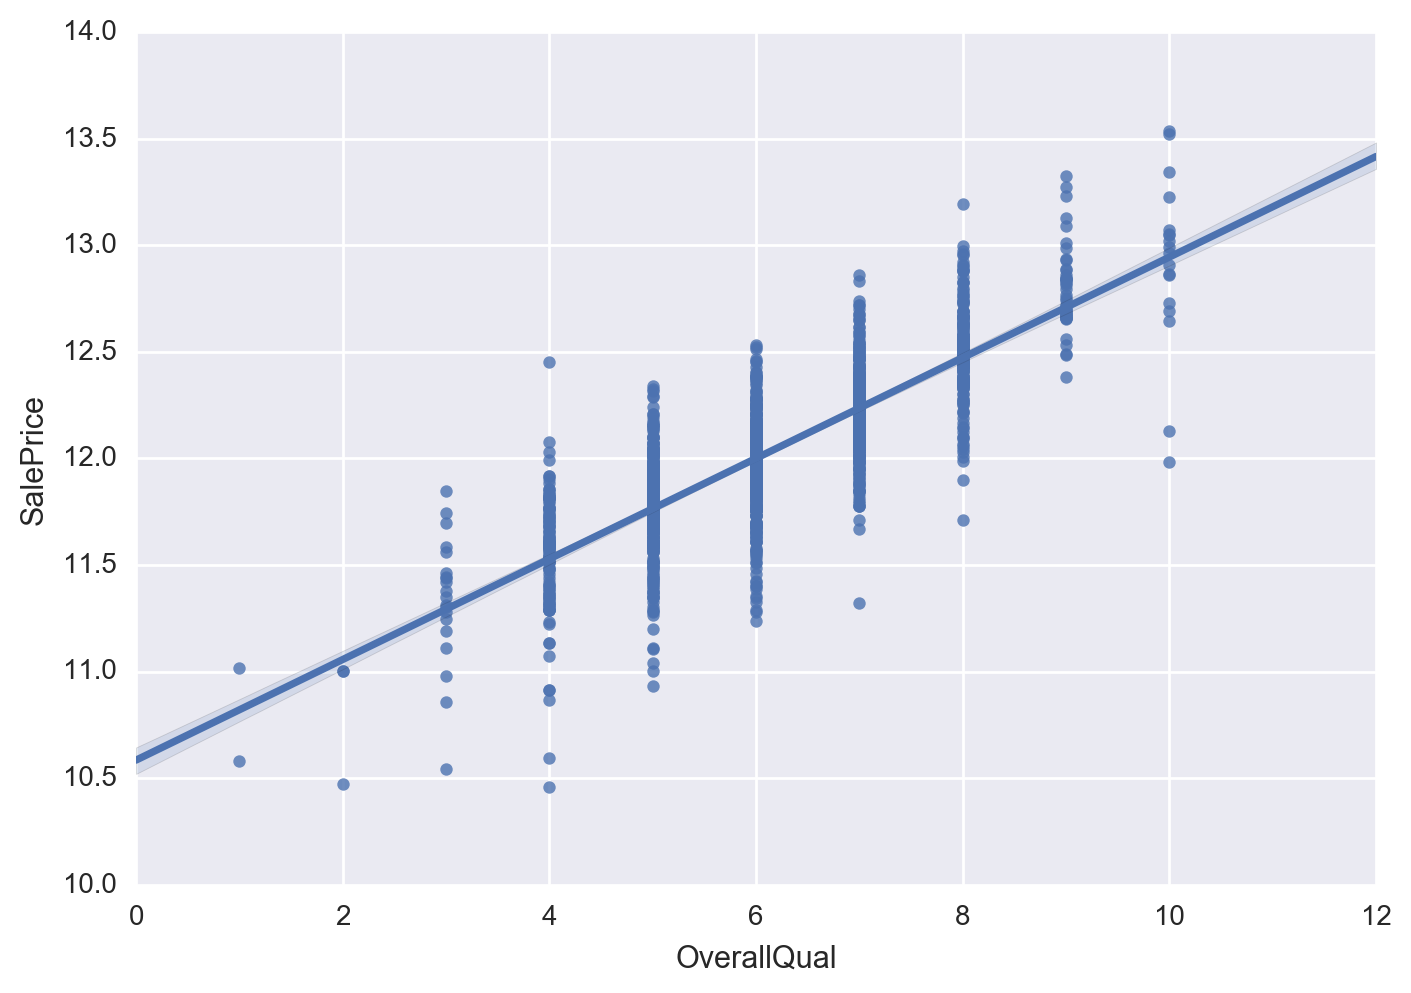

In [12]:
sns.set(color_codes=True)
sns.regplot(x = 'OverallQual', y = 'SalePrice', data=train)

观察object类型与房价的关系

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 <a list of 25 Text xticklabel objects>)

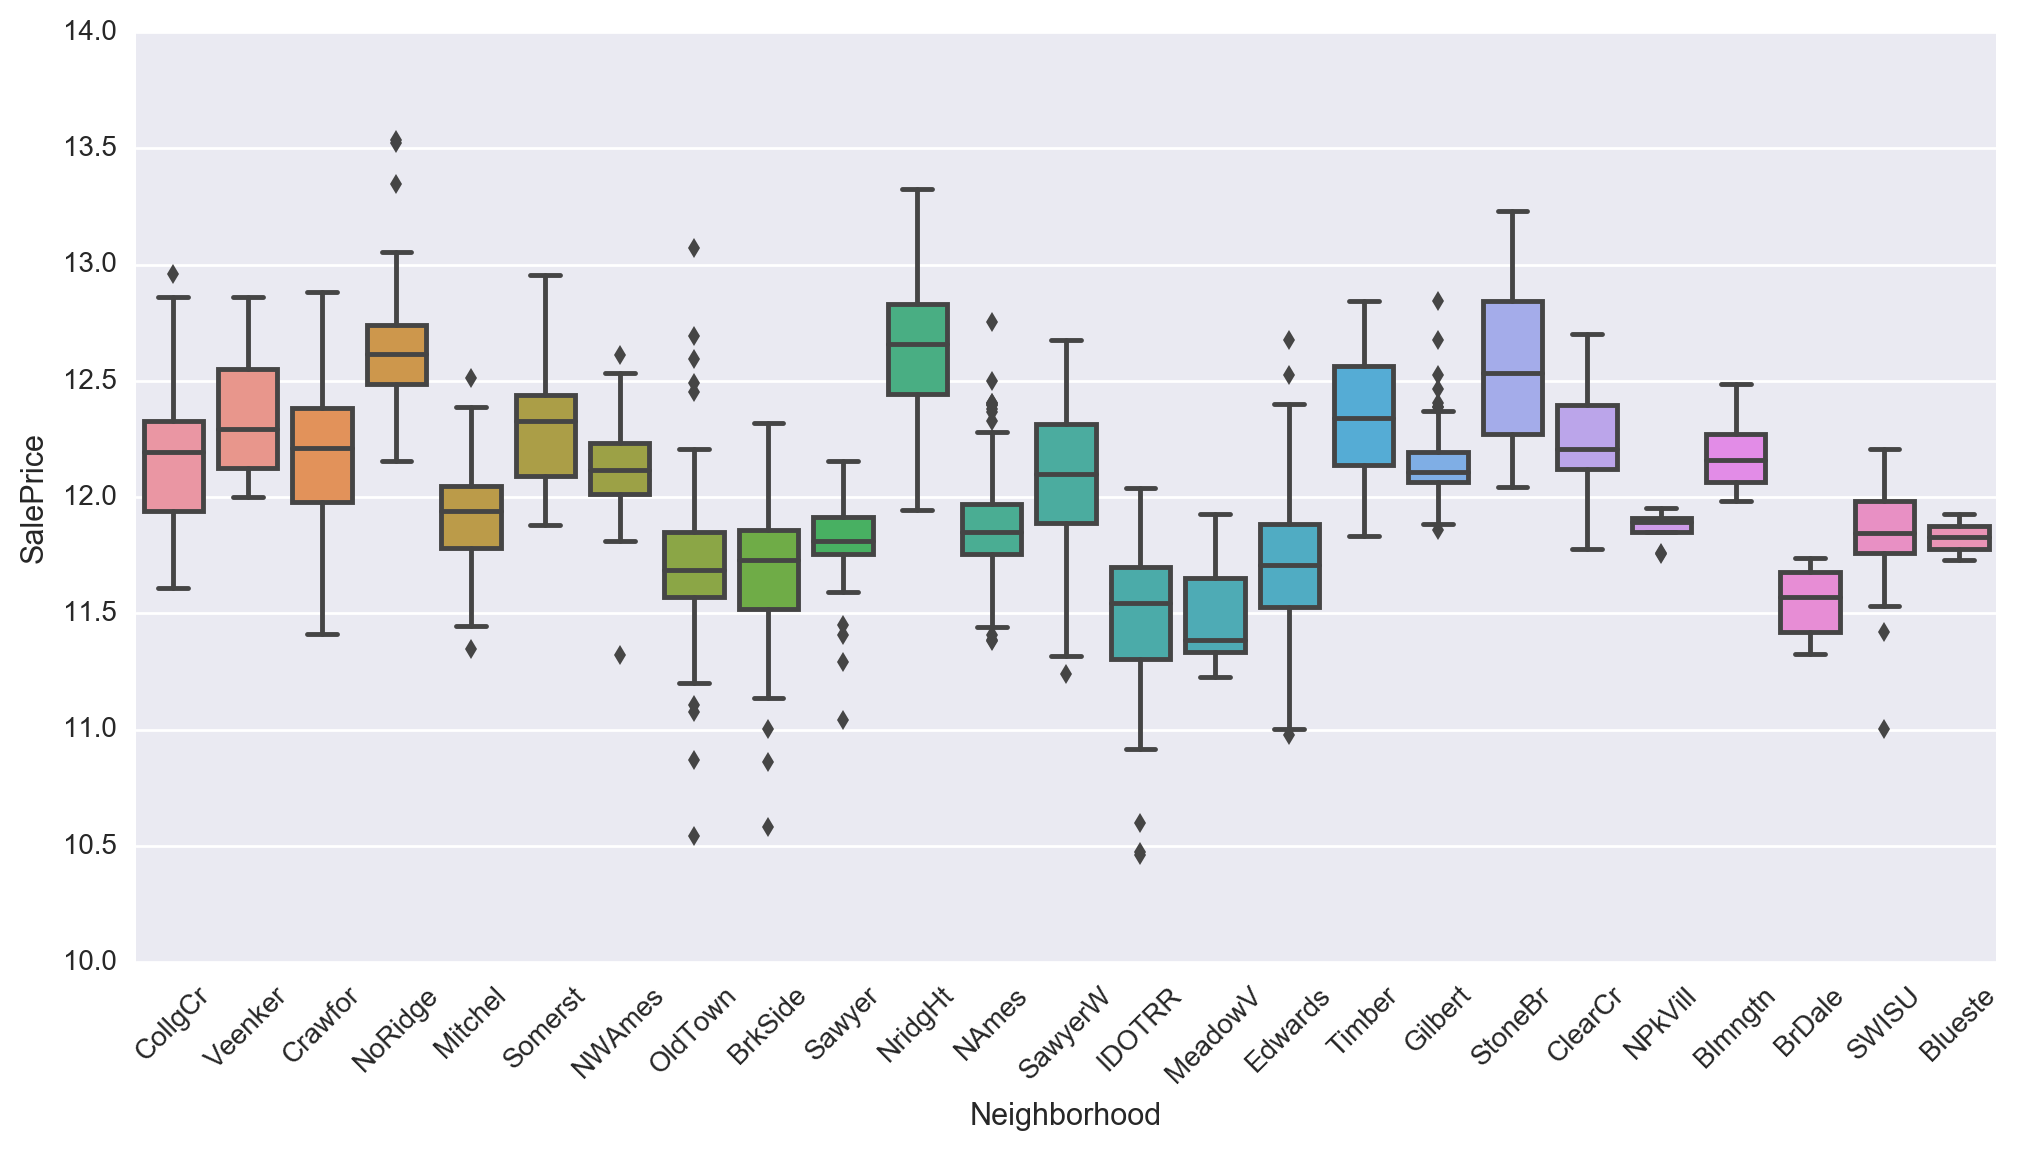

In [15]:
plt.figure(figsize=(12, 6))
sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data=train)
plt.xticks(rotation=45)

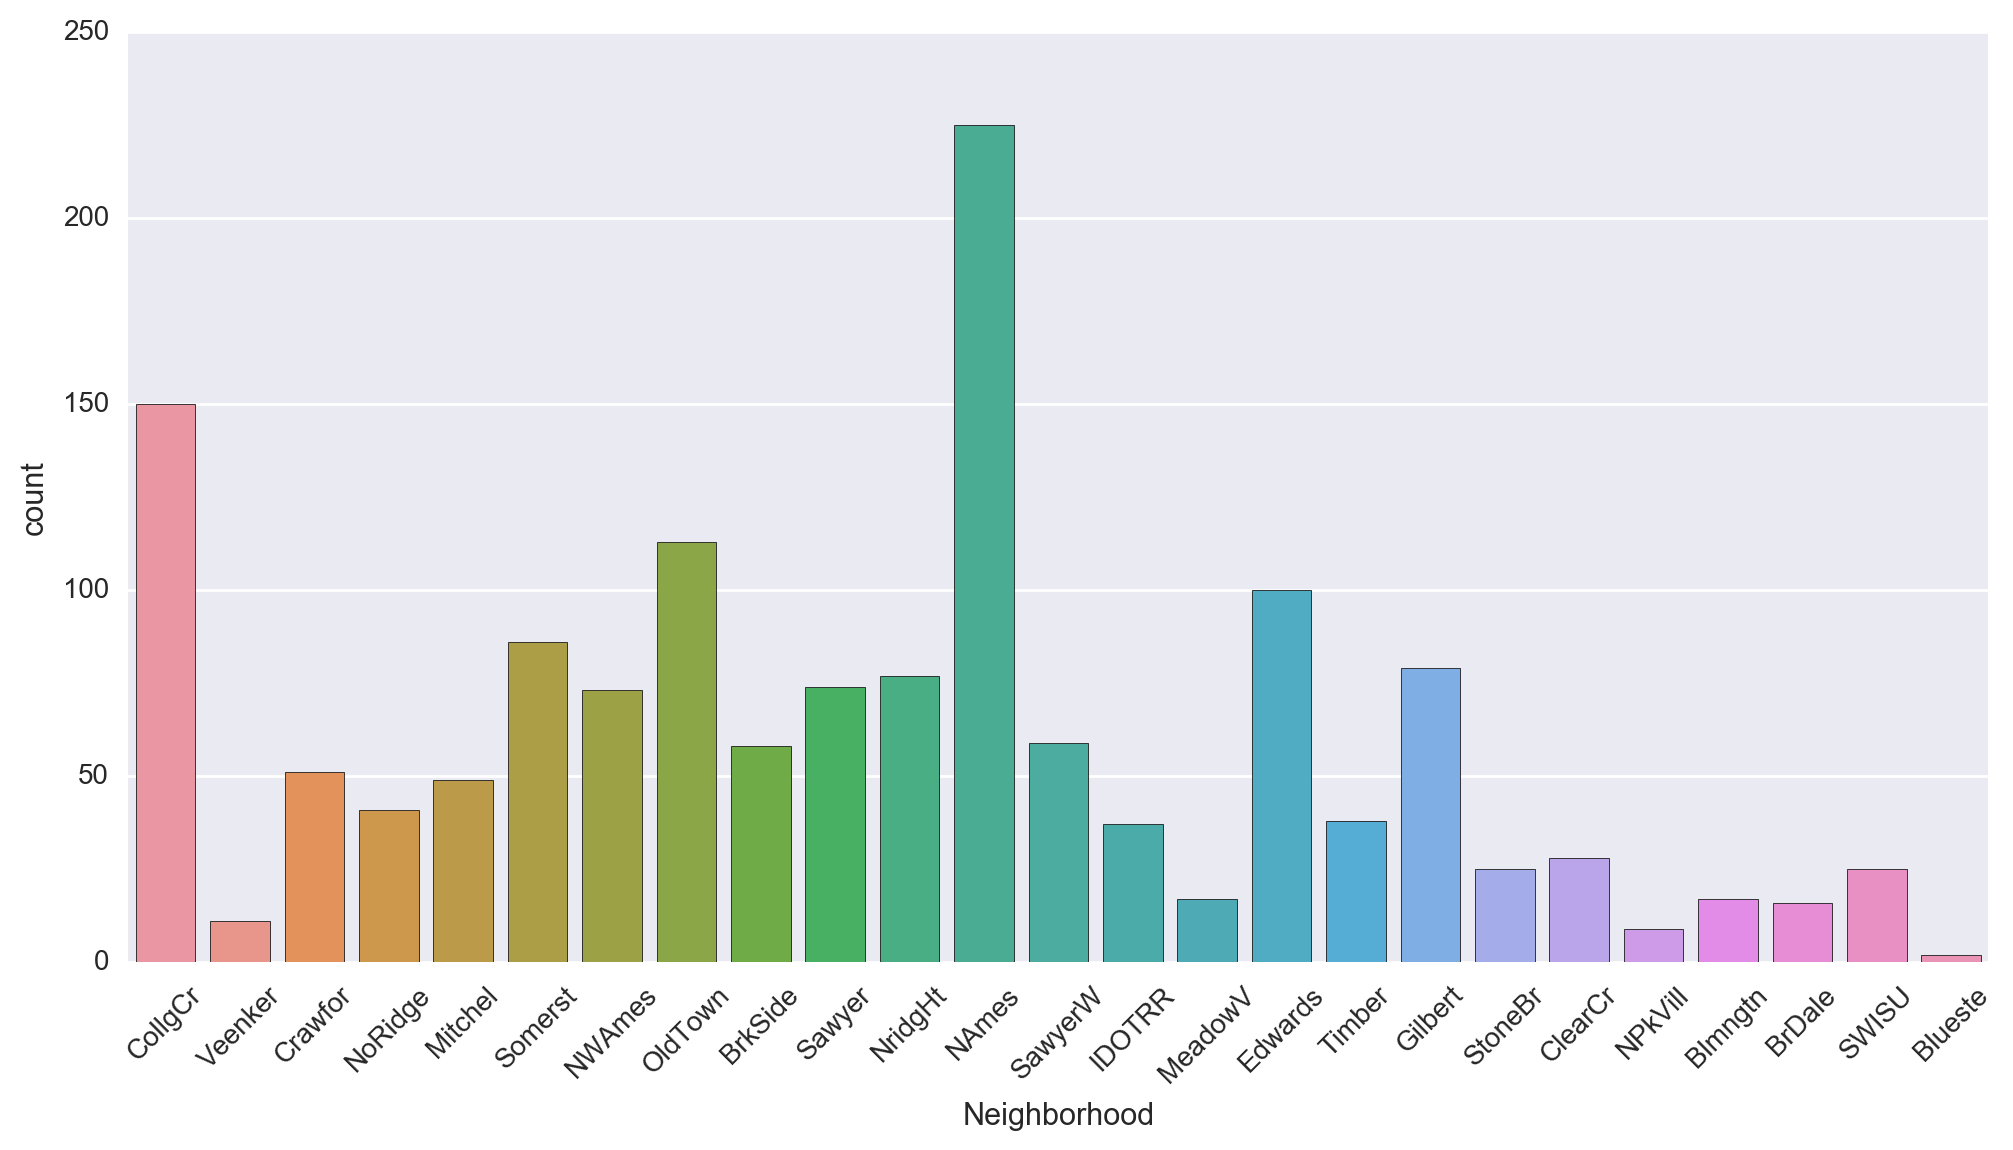

In [17]:
plt.figure(figsize = (12, 6))
sns.countplot(x = 'Neighborhood', data = train)
xt = plt.xticks(rotation=45)

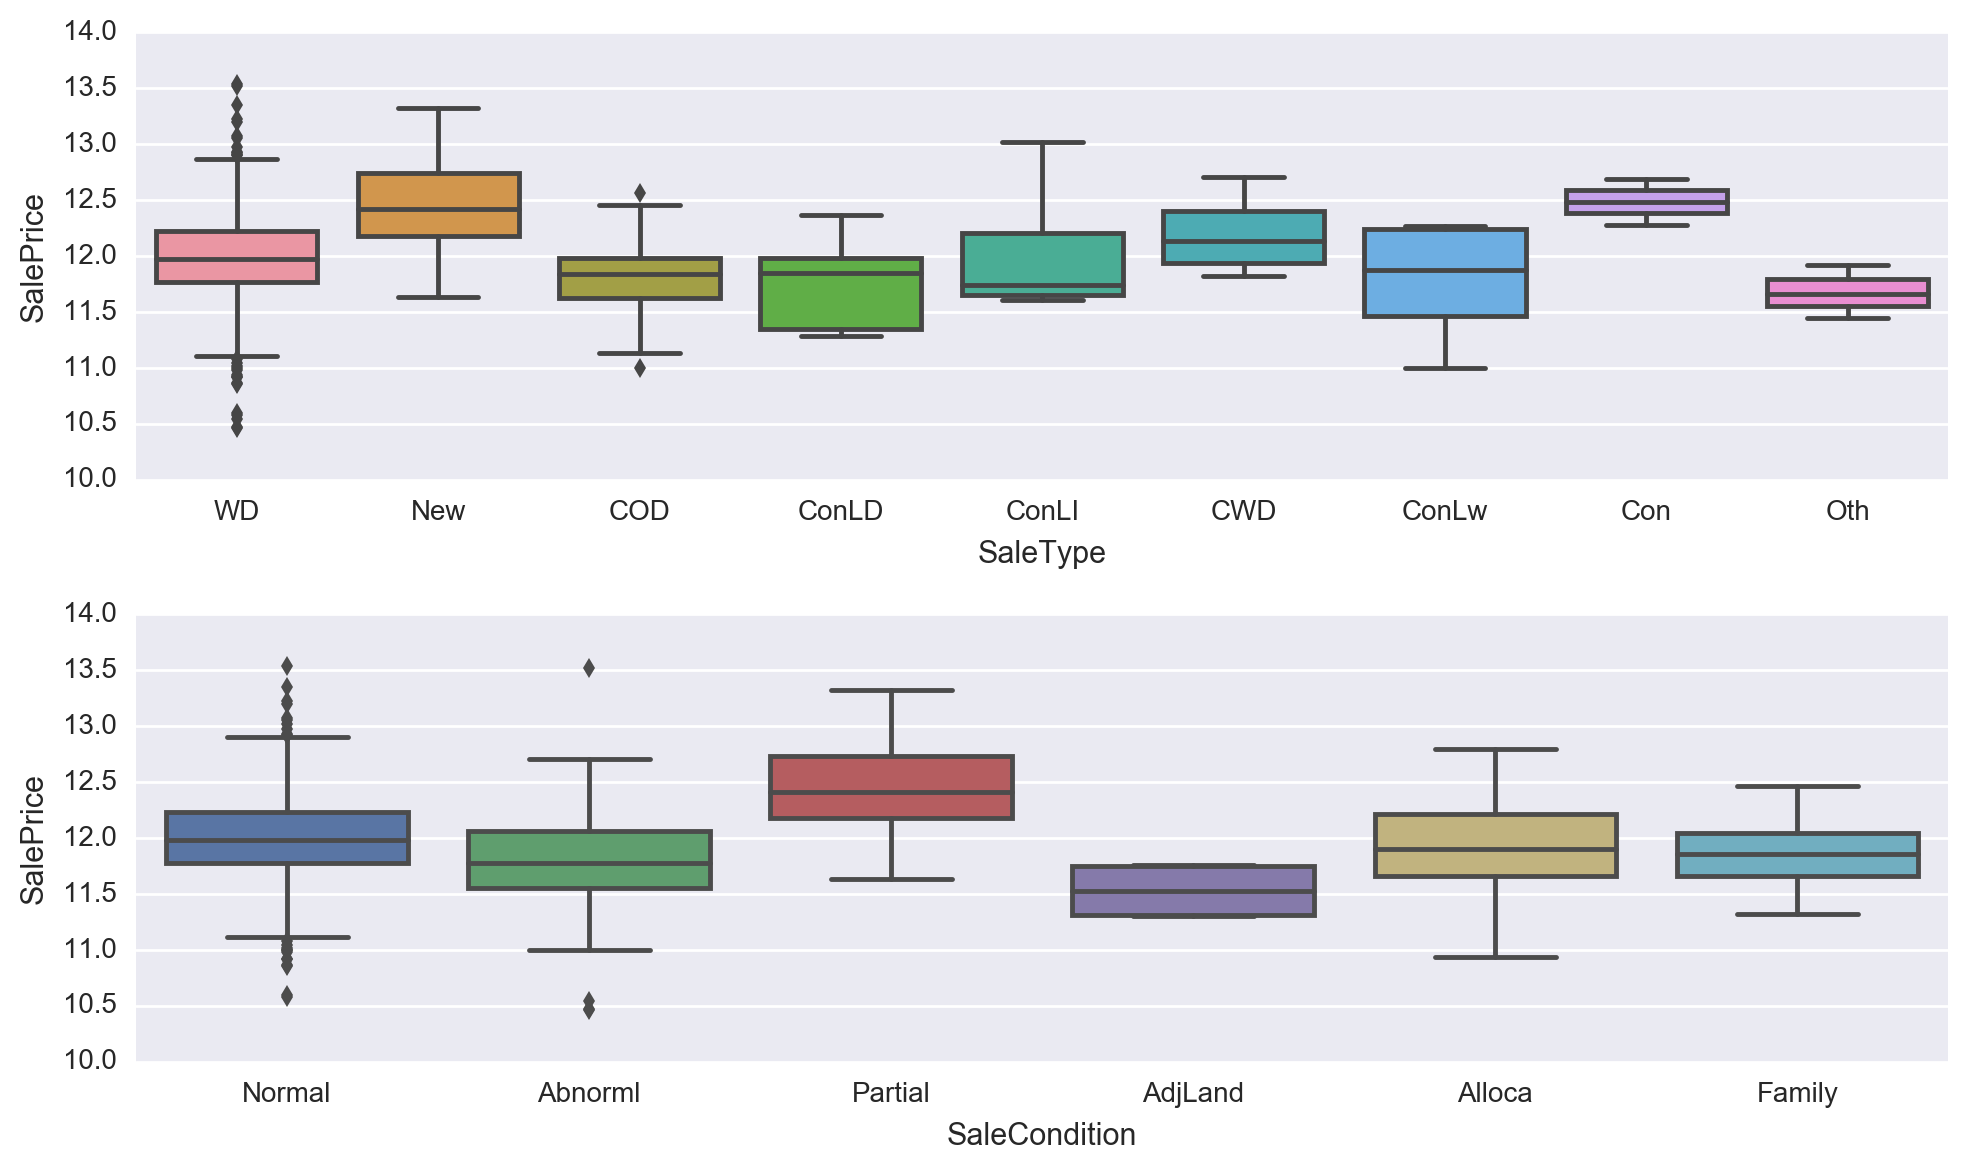

In [19]:
fig, ax = plt.subplots(2, 1, figsize = (10, 6))
sns.boxplot(x = 'SaleType', y = 'SalePrice', data = train, ax = ax[0])
sns.boxplot(x = 'SaleCondition', y = 'SalePrice', data = train, ax = ax[1])
plt.tight_layout()

# 数据预处理

In [21]:
# 将训练和测试数据放在一块儿进行处理，去除训练数据的第一列和最后一列
all_data = pd.concat((train.loc[:,'MSSubClass':'SaleCondition'],
                      test.loc[:,'MSSubClass':'SaleCondition']))
print all_data.shape
# print all_data.head()

(2919, 79)


In [29]:
# 将特征中 偏斜度>0.75的特征 取log1p
numeric_feats = all_data.dtypes[all_data.dtypes != 'object'].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats = skewed_feats.index

all_data[skewed_feats] = np.log1p(all_data[skewed_feats])

In [34]:
all_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,4.110874,RL,4.189655,9.042040,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.0,2,2008,WD,Normal
1,3.044522,RL,4.394449,9.169623,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.0,5,2007,WD,Normal
2,4.110874,RL,4.234107,9.328212,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0.0,0.0,NaN,NaN,NaN,0.0,9,2008,WD,Normal
3,4.262680,RL,4.110874,9.164401,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0.0,0.0,NaN,NaN,NaN,0.0,2,2006,WD,Abnorml
4,4.110874,RL,4.442651,9.565284,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0.0,0.0,NaN,NaN,NaN,0.0,12,2008,WD,Normal


In [37]:
# 进行独热编码
all_data = pd.get_dummies(all_data)
all_data.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,4.110874,4.189655,9.042040,7,5,2003,2003,5.283204,6.561031,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.044522,4.394449,9.169623,6,8,1976,1976,0.000000,6.886532,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,4.110874,4.234107,9.328212,7,5,2001,2002,5.093750,6.188264,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.262680,4.110874,9.164401,7,5,1915,1970,0.000000,5.379897,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,4.110874,4.442651,9.565284,8,5,2000,2000,5.860786,6.486161,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [38]:
all_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,3.820503,4.196175,9.094915,6.089072,5.564577,1971.312778,1984.264474,2.095752,4.226403,0.681207,...,0.002741,0.081877,0.002398,0.865022,0.065091,0.004111,0.008222,0.015759,0.822885,0.083933
std,0.692436,0.350864,0.509882,1.409947,1.113131,30.291442,20.894344,2.624720,2.981325,1.878810,...,0.052289,0.274225,0.048920,0.341758,0.246728,0.063996,0.090317,0.124562,0.381832,0.277335
min,3.044522,3.091042,7.170888,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.044522,NaN,8.919854,5.000000,5.000000,1953.500000,1965.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.931826,NaN,9.154193,6.000000,5.000000,1973.000000,1993.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.262680,NaN,9.356257,7.000000,6.000000,2001.000000,2004.000000,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.252273,5.749393,12.279537,10.000000,9.000000,2010.000000,2010.000000,7.378384,8.638525,7.331060,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [39]:
# 用均值填补空缺
all_data = all_data.fillna(all_data.mean())
all_data.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,...,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000
mean,3.820503,4.196175,9.094915,6.089072,5.564577,1971.312778,1984.264474,2.095752,4.226403,0.681207,...,0.002741,0.081877,0.002398,0.865022,0.065091,0.004111,0.008222,0.015759,0.822885,0.083933
std,0.692436,0.320316,0.509882,1.409947,1.113131,30.291442,20.894344,2.614355,2.980814,1.878488,...,0.052289,0.274225,0.048920,0.341758,0.246728,0.063996,0.090317,0.124562,0.381832,0.277335
min,3.044522,3.091042,7.170888,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.044522,4.110874,8.919854,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,3.931826,4.196175,9.154193,6.000000,5.000000,1973.000000,1993.000000,0.000000,5.910797,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,4.262680,4.369448,9.356257,7.000000,6.000000,2001.000000,2004.000000,5.102906,6.598509,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,5.252273,5.749393,12.279537,10.000000,9.000000,2010.000000,2010.000000,7.378384,8.638525,7.331060,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [40]:
# 处理完毕，重新分为训练集和测试集
X_train = all_data[:train.shape[0]]
y_train = train['SalePrice']
X_test = all_data[train.shape[0]:]
print X_train.shape
print y_train.shape
print X_test.shape

(1460, 288)
(1460,)
(1459, 288)


## 建立回归模型

In [67]:
from sklearn.linear_model import Ridge, RidgeCV, ElasticNet, LassoCV, LassoLarsCV
from sklearn.cross_validation import cross_val_score
from sklearn.grid_search import GridSearchCV

In [97]:
# 切分数据集
from sklearn.cross_validation import train_test_split

X_train1, X_train2, y_train1, y_train2 = train_test_split(X_train, y_train, test_size = 0.2)
print X_train1.shape
print X_train2.shape
print y_train1.shape
print y_train2.shape

(1168, 288)
(292, 288)
(1168,)
(292,)


### 使用Ridge岭回归
- 使用交叉验证确定惩罚值

In [100]:
alphas = [0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75]
param_grid = [{'alpha': alphas}]
gs = GridSearchCV(estimator=Ridge(), param_grid=param_grid, scoring='mean_squared_error', cv=5, n_jobs=-1)

In [101]:
gs = gs.fit(X_train1, y_train1)

In [102]:
print gs.best_score_
print gs.best_params_
print gs.best_estimator_
# 得到alpha值最优为10

-0.0187738113153
{'alpha': 15}
Ridge(alpha=15, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)


In [103]:
clf = gs.best_estimator_
clf.fit(X_train1, y_train1)

Ridge(alpha=15, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [104]:
clf.score(X_train2, y_train2)

0.93473735676250846

- 使用RidgeCV直接确定alpha值

In [105]:
reg = RidgeCV(alphas=alphas)
reg.fit(X_train1, y_train1)

RidgeCV(alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75], cv=None,
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False)

In [106]:
reg.alpha_

10.0

In [107]:
reg.score(X_train2, y_train2)

0.93406754576168383

In [110]:
reg = LassoCV(alphas=alphas)
reg.fit(X_train1, y_train1)

LassoCV(alphas=[0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 75], copy_X=True,
    cv=None, eps=0.001, fit_intercept=True, max_iter=1000, n_alphas=100,
    n_jobs=1, normalize=False, positive=False, precompute='auto',
    random_state=None, selection='cyclic', tol=0.0001, verbose=False)

In [111]:
reg.alpha_

0.050000000000000003

In [112]:
reg.score(X_train2, y_train2)

0.8327121215151696

用Ridge，alpha=10预测

In [132]:
clf = Ridge(alpha=10)
clf.fit(X_train, y_train)
RidgePre = clf.predict(X_test)

In [134]:
RidgePre = np.expm1(RidgePre)

array([ 119029.13949495,  153034.77868944,  181011.21425071, ...,
        171647.29093014,  117310.75715699,  224527.87654077])

In [136]:
solutionRidge = pd.DataFrame({"Id":test['Id'], "SalePrice":RidgePre})
solutionRidge.to_csv('Ridge.csv', index=False)

### 使用xgboost

In [113]:
import xgboost as xgb

In [117]:
dtrain = xgb.DMatrix(X_train, y_train)
dtest = xgb.DMatrix(X_test)
params = {'max_depth': 2, 'eta': 0.1}
model = xgb.cv(params, dtrain,  num_boost_round=500, early_stopping_rounds=100)

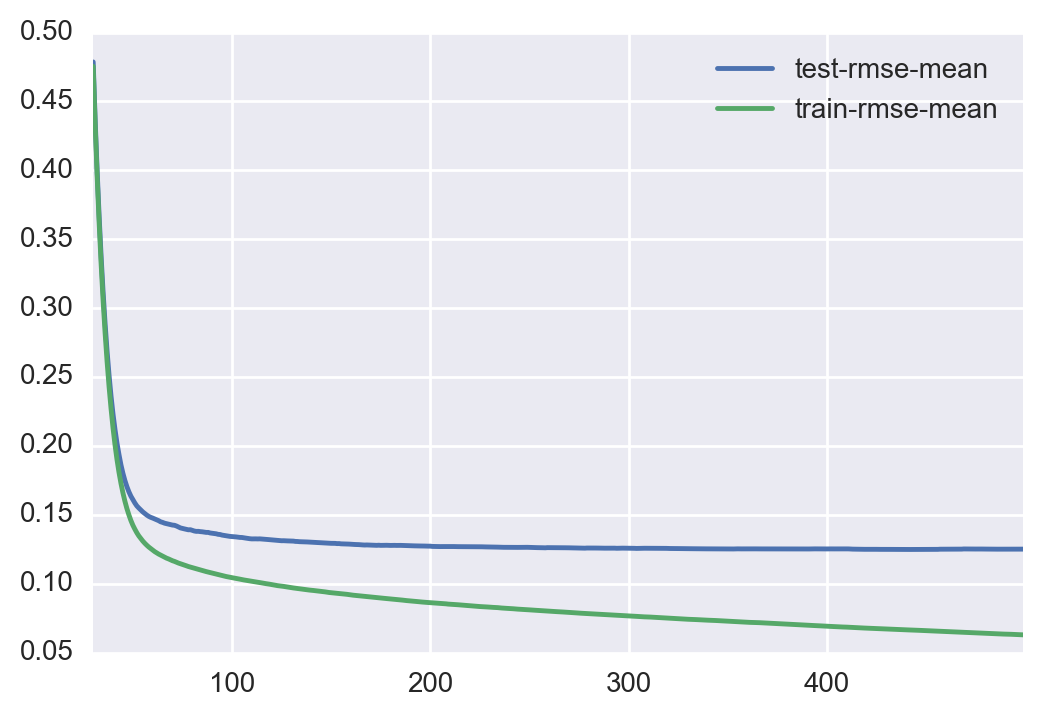

In [118]:
model.loc[30:,["test-rmse-mean", "train-rmse-mean"]].plot()

In [119]:
model_xgb = xgb.XGBRegressor(n_estimators=360, max_depth=2, learning_rate=0.1) #the params were tuned using xgb.cv
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=1, gamma=0,
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=1, missing=None, n_estimators=360, nthread=-1,
       objective='reg:linear', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [129]:
xgb_preds = np.expm1(model_xgb.predict(X_test)) # 对log1p恢复

In [130]:
print X_test.shape
print xgb_preds.shape

(1459, 288)
(1459,)


In [137]:
solutionXgb = pd.DataFrame({
        'Id':test['Id'],
        'SalePrice': xgb_preds
    })
solution.to_csv('xgb.csv', index=False)